<h1>Стратегия взаимодействия с клиентами для сети фитнес-центров «Культурист-датасаентист»<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Задачи-проекта" data-toc-modified-id="Задачи-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задачи проекта</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов." data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов.</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Выводы-и-базовые-рекомендации-по-работе-с-клиентами-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы и базовые рекомендации по работе с клиентами</a></span></li></ul></div>

## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

## Задачи проекта

1) научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

2) сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

3) проанализировать основные признаки, наиболее сильно влияющие на отток;

4) сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
- выделить целевые группы клиентов;
- предложить меры по снижению оттока;
- определить другие особенности взаимодействия с клиентами.

## Обзор данных

In [1]:
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns; sns.set()
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
pd.options.display.expand_frame_repr = False
import warnings
warnings.filterwarnings('ignore')  

In [2]:
# Прочитаем представленные данные.

try:
    gym_churn = pd.read_csv('C:\\Users\\1325165\\Desktop\\ML\\gym_churn.csv')
    
except:
    gym_churn = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
# Посмотрим состав данных.

gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Набор данных включает следующие поля:

Данные клиента за предыдущий до проверки факта оттока месяц:

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

In [4]:
# Сменим названия столбцов на нижний регистр.

gym_churn.columns = map(str.lower, gym_churn.columns)

## Исследовательский анализ данных (EDA)

Посмотрим на датасет: есть ли в нём пропуски или дубликаты, изучим средние значения и стандартные отклонения.

In [5]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [6]:
gym_churn.duplicated().sum()

0

Всего датасет содержит данные о 4000 пользователей, пропусков и дубликатов в данных нет. Выведем описательные характеристики представленных данных. 

In [7]:
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Средний и медианный возраст посетителей клуба - 29 лет, стандартное отклонение +- 3 года. 

Средняя суммарная выручка с клиента - 146, а медианная - 136, при максимальной - 552 и минимальной - менее 1. 

Время с момента первого обращения у 50% - 3 месяца, у 75% - 5 месяцев, максимальное - 31 месяц, минимальное - новичок - менее месяца.

Средняя частота посещений в неделю за весь период использования абонемента у 50% - менее 2-ух раз, у 75% - 2,5 раза. Максимально - 6 раз, минимально - ни разу в неделю. 

Средння частота посещений в неделю за предыдущий месяц у 50% - 1,7 раз, у 75% - 2,5 раза, максимум - 6 раз, минимум - 0 раз.

По промо-акции пришли 30% посетителей. 

Групповые тренировки посещают - 41 %. 

Общий отток - 26 %.

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [8]:
# Сгруппируем по признаку churn: 0 - остался, 1 - ушел в отток. 

churn = gym_churn.groupby('churn').describe().T

In [9]:
# Снимем ограничения на вывод строк.

pd.set_option('display.max_rows', None)

In [10]:
# Выведем полученный датасет.

churn

churn                                              0            1
gender                            count  2939.000000  1061.000000
                                  mean      0.510037     0.510839
                                  std       0.499984     0.500118
                                  min       0.000000     0.000000
                                  25%       0.000000     0.000000
                                  50%       1.000000     1.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
near_location                     count  2939.000000  1061.000000
                                  mean      0.873086     0.768143
                                  std       0.332933     0.422217
                                  min       0.000000     0.000000
                                  25%       1.000000     1.000000
                                  50%       1.000000     1.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
partner                           count  2939.000000  1061.000000
                                  mean      0.534195     0.355325
                                  std       0.498914     0.478837
                                  min       0.000000     0.000000
                                  25%       0.000000     0.000000
                                  50%       1.000000     0.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
promo_friends                     count  2939.000000  1061.000000
                                  mean      0.353522     0.183789
                                  std       0.478144     0.387495
                                  min       0.000000     0.000000
                                  25%       0.000000     0.000000
                                  50%       0.000000     0.000000
                                  75%       1.000000     0.000000
                                  max       1.000000     1.000000
phone                             count  2939.000000  1061.000000
                                  mean      0.903709     0.902922
                                  std       0.295040     0.296204
                                  min       0.000000     0.000000
                                  25%       1.000000     1.000000
                                  50%       1.000000     1.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
contract_period                   count  2939.000000  1061.000000
                                  mean      5.747193     1.728558
                                  std       4.716942     2.132371
                                  min       1.000000     1.000000
                                  25%       1.000000     1.000000
                                  50%       6.000000     1.000000
                                  75%      12.000000     1.000000
                                  max      12.000000    12.000000
group_visits                      count  2939.000000  1061.000000
                                  mean      0.464103     0.268615
                                  std       0.498795     0.443448
                                  min       0.000000     0.000000
                                  25%       0.000000     0.000000
                                  50%       0.000000     0.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
age                               count  2939.000000  1061.000000
                                  mean     29.976523    26.989632
                                  std       3.009933     2.895163
                                  min   

Длительность действующего абонемента для тех, кто остался - среднее значение - более 5 месяцев, для тех, кто ушел - чуть более 1 месяца, т.е. обычно клиенты уходят в отток примерно за 1,5 месяца до окончания действия абонемента.

Средний возраст тех, кто остался - 29 лет, а тех кто ушел - 27 лет. 

Тех, кто пришел по партнерской программе - 53% осталось, 35% - ушли в отток. 

Средння выручка от тех, кто остался незначительно выше, чем выручка от ушедших клиентов, около 40. 

Средний лайфтайм для оставшихся клиентов около 4 месяцев, для ушедших - чуть более месяца. 

Оставшиеся клиенты в среднем посещают клуб - 2 раза в неделю, ушедшие - 1, цифры за последний месяц и за весь период примерно одинаковые. 

Групповые тренировки посещают 46% оставшихся клиентов и 26 % - ушедших.

По промо-акции пришли 35% клиентов, которые не ушли в отток и 18% - ушедших в отток. 

Пол клиентов кажется никак не влияет на попадание в отток или нет.

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

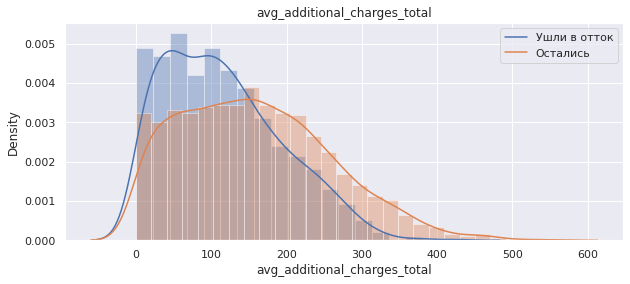

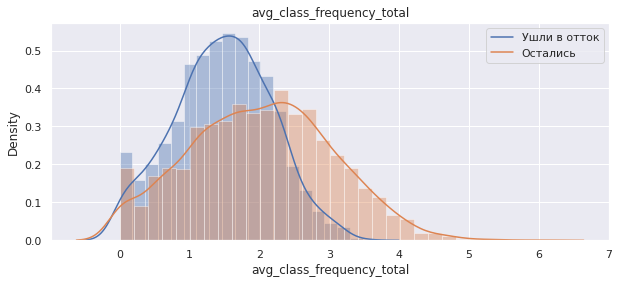

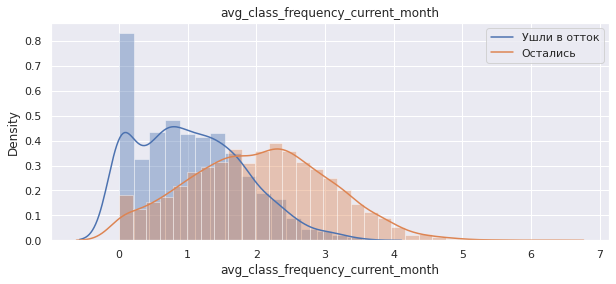

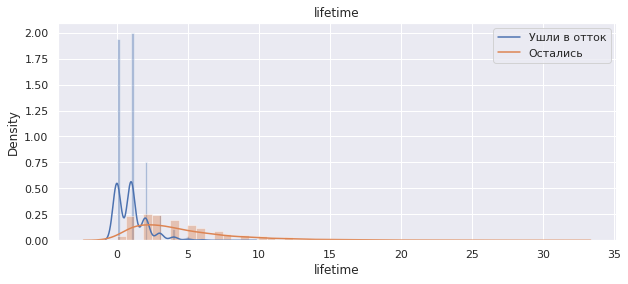

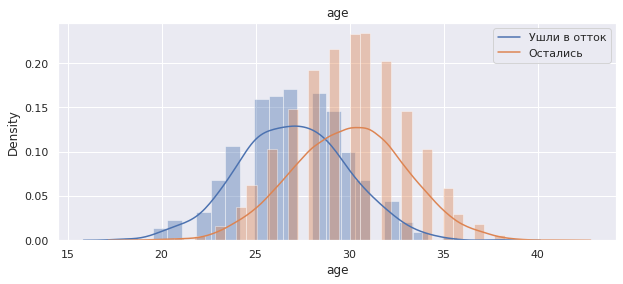

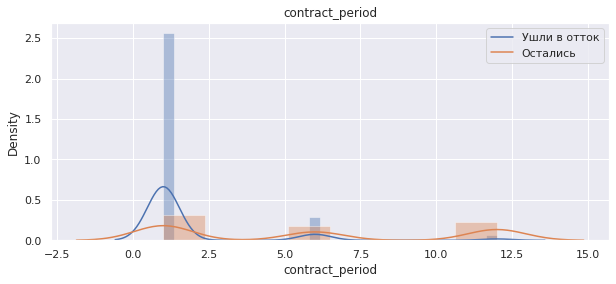

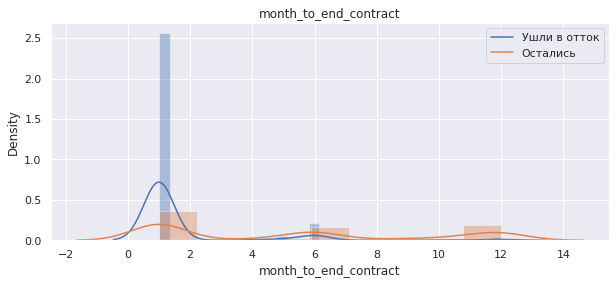

In [11]:
# Сохраним данные о тех, кто ушел, и тех, кто остался в разные переменные. 

churn_1 = gym_churn[gym_churn['churn'] == 1]
churn_0 = gym_churn[gym_churn['churn'] == 0]

# Создадим список с названиями столбцов с числовыми значениями, по которым будем строить гистограмму. 

distplot_columns = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'lifetime', 'age', 
                    'contract_period', 'month_to_end_contract']

# Пропишем цикл для построения гистограмм.

for column in distplot_columns: 
    plt.figure(figsize=(10,4)) 
    plt.title(column)
    sns.distplot(churn_1[column])
    sns.distplot(churn_0[column])
    plt.legend(['Ушли в отток', 'Остались'])
    plt.show()

Выводы по графикам: 
- Клиенты, которые ушли, тратили меньше на дополнительные опции;
- Клиенты, которые остались, чаще посещают клуб, как в последний месяц, так и в общем;
- Лайфтайм у клиентов, которые ушли значительно короче, до 5 месяцев;
- Распределение по возрасту незначительно отличается, клиенты, которые остались незначительно старше;
- Больше всего клиентов уходит в отток, когда подходит к концу действие абонемента, примерно за месяц до его окончания.

Графики подтвердили наши предыдущие выводы. 

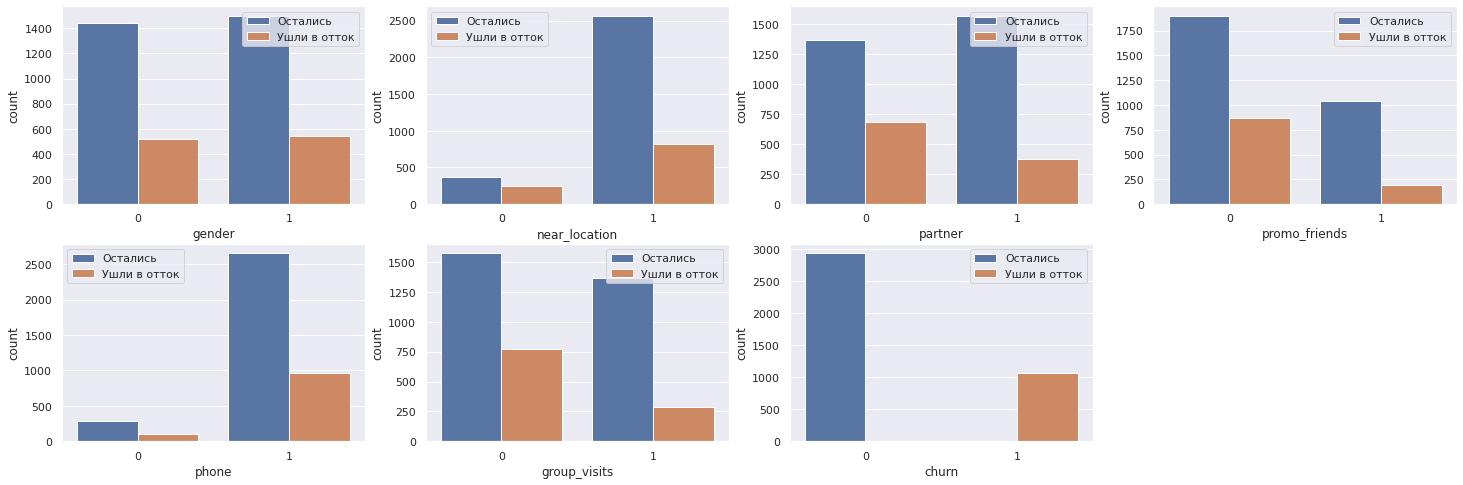

In [12]:
# Создадим цикл и отрисуем графики для столбцов с бинарными значениями. 

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,8))
axes_list = [item for sublist in axes for item in sublist]
fig.delaxes(axes_list[-1])
for column in gym_churn.columns:
    if column not in distplot_columns:
        ax = axes_list.pop(0)
        sns.countplot(x = gym_churn[column], hue='churn', data=gym_churn, ax=ax)
        ax.legend(['Остались', 'Ушли в отток'])

Выводы по графикам: 
- очевидно, что пол не играет роли, при принятии решения клиентом об уходе, и мужчины, и женщины принимают такие решения одинаково часто;
- клиенты, которые проживают или работают ближе к клубу реже его покидают;
- клиенты присоединившиеся к клубу по партнерской программе чаще в нем задерживаются, что логично;
- пришедшие по промо-акции акции чаще уходят в отток;
- посещающие групповые занятия реже уходят в отток, но возможно, что есть те, кто ушли и не пробовали групповые занятия.

Выводы подтверждают наши предыдущие. 

Построим матрицу корреляции. 

<AxesSubplot:title={'center':'Матрица корреляций'}>

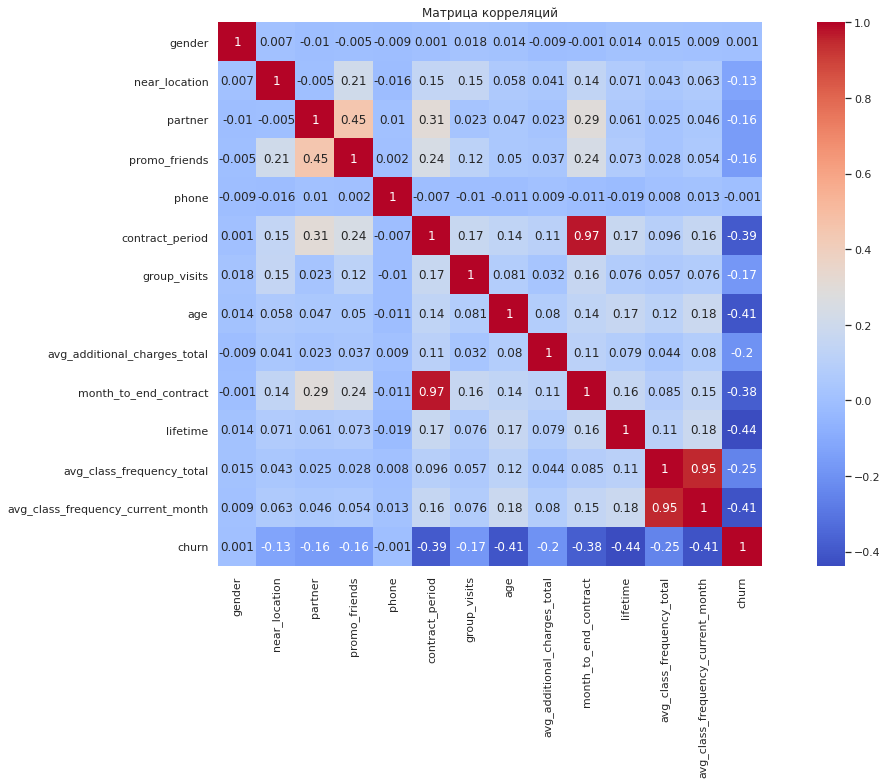

In [13]:
corr = gym_churn.corr().round(3)
 
sns.set(rc = {'figure.figsize':(20,10)}) 
plt.title('Матрица корреляций')
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm')


Мультиколлинеарными признакоми в данном случае будут: contract_period и month_to_end_contact, и avg_class_frequency_current_month и avg_clfss_frequency_total.

Явной зависимости факта оттока от какого-либо признака не обнаружено. Присутствует умеренная линейная зависимость между уходом из клуба и периодом абонемента, возрастом, количеством месяцев до окончания абонемента, лайфтаймом, количеством посещений за последний месяц. 

## Построение модели прогнозирования оттока клиентов.

Построим модель бинарной классификации клиентов, где целевой признак - факт оттока клиента в следующем месяце. 

Обучим модель на train-выборке двумя способами:

- логистическая регрессия;
- случайный лес.

Оценим полученные после обучения моделей метрики: accuracy, precision, recall. 

In [14]:
# Разделим наши данные на признаки (матрица X) и целевую переменную (y). 

X = gym_churn.drop(['churn'], axis = 1)
y = gym_churn['churn']

# Разделим модель на обучающую и валидационную выборки.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Создадим объект класса StandardScaler и применим его к обучающей выборке.

scaler = StandardScaler()

# Обучим scaler и одновременно трансформируем матрицу для обучающей выборки.

X_train_st = scaler.fit_transform(X_train)

# Применим стандартизацию к матрице признаков для тестовой выборки.

X_test_st = scaler.transform(X_test)

In [15]:
# Обучим модель методом логистической регрессии.

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

# Выведем метрики для логической регрессии.

print('Метрики для модели логистической регрессии:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, lr_predictions),
    precision_score(y_test, lr_predictions),
    recall_score(y_test, lr_predictions)
))

# Обучим модель методом случайный лес. 

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

# Выведем метрики для модели случайного леса.

print('\nМетрики для модели случайного леса:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, rf_predictions),
    precision_score(y_test, rf_predictions),
    recall_score(y_test, rf_predictions)
))

Метрики для модели логистической регрессии:
accuracy_score: 0.9225
precision_score: 0.8541666666666666
recall_score:0.8282828282828283

Метрики для модели случайного леса:
accuracy_score: 0.915
precision_score: 0.8385416666666666
recall_score:0.8131313131313131


Судя по метрикам доля правильных прогнозов и их полнота незначительно выше в модели обученной методом логистической регрессии. 

In [16]:
# Выведем признаки и их коэффиценты для логистической регрессии. 

features = pd.DataFrame(lr_model.coef_.T, X.columns).reset_index()
features.columns = ['feature', 'coef']
features['coef'] = features['coef'].apply(lambda x: abs(x))
features = features.sort_values(by='coef', ascending=False)
print('\nКоэффициенты признаков в оптимальной функции логистической регрессии:')
print(features)


Коэффициенты признаков в оптимальной функции логистической регрессии:
                              feature      coef
12  avg_class_frequency_current_month  4.454231
10                           lifetime  3.846281
11          avg_class_frequency_total  3.299788
7                                 age  1.091431
5                     contract_period  0.719095
8        avg_additional_charges_total  0.552164
9               month_to_end_contract  0.534026
6                        group_visits  0.393453
3                       promo_friends  0.275671
2                             partner  0.081512
1                       near_location  0.075644
0                              gender  0.013079
4                               phone  0.004908


## Кластеризация клиентов

Проведем кластеризацию клиентов:

Стандартизируем данные.

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуеи дендрограмму.

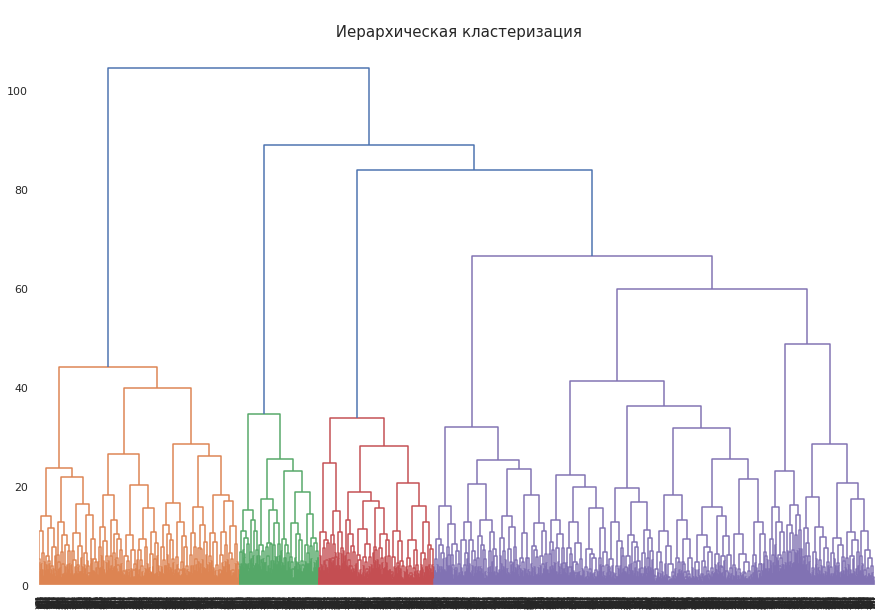

In [17]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()

Выводы из дендрограммы можно сделать такие: скорее всего клиентов клуба можно разбить на 4 класстера, возможно это будет несколько обобщенно, поэтому мы примем за число кластеров n=5.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. 

In [18]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_st)
gym_churn['cluster_km'] = labels

Посмотрим на средние значения признаков для кластеров.

In [19]:
gym_churn.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


In [20]:
cluster_features = gym_churn.groupby('cluster_km').mean().reset_index()
numeric_columns = cluster_features.drop(columns=['cluster_km']).columns
cluster_features.style.format({i: '{:.2f}' for i in numeric_columns}) \
    .highlight_max(color='yellowgreen', subset=numeric_columns) \
    .highlight_min(color='coral', subset=numeric_columns)

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.50,0.96,0.78,0.57,1.00,10.89,0.54,29.98,160.76,9.95,4.74,1.98,1.97,0.03
1,1,0.52,0.86,0.47,0.31,0.00,4.79,0.43,29.30,143.96,4.48,3.92,1.85,1.72,0.27
2,2,0.50,0.00,0.46,0.08,1.00,2.35,0.22,28.48,135.46,2.20,2.81,1.66,1.48,0.44
3,3,0.49,1.00,0.35,0.24,1.00,1.95,0.34,28.17,131.62,1.86,2.44,1.25,1.01,0.51
4,4,0.56,0.98,0.36,0.23,1.00,2.67,0.47,30.13,161.66,2.46,4.90,2.85,2.85,0.07


In [21]:
# Посмотрим на количественный состав кластеров.

gym_churn['cluster_km'].value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: cluster_km, dtype: int64

Основные описательные моменты для кластеров:

Кластер 0:
- Отток - 3 % - самый низкий
- Живут или работают недалеко от фитнес-центра
- Преобладают сотрудники компаний-партнеров - 78 %
- Заключают договора на длительный срок - более 10 месяцев
- Чаще всех посещают групповые занятия - 54 %
- Чаще всех пришли по промо акции


Кластер 1:
- Отток - 26 %
- Живут или работают недалеко от фитнес-центра
- Нет мобильного номера
- В среднем 4.5 месяцев контракты
- 30 % пришли по промо-акции

Кластер 2:
- Отток - 44 %
- Живут или работают не возле клуба
- Всего 7 % пришли по промо акции
- Реже всех посещают групповые занятия

Кластер 3
- Отток - почти 52 % - самый высокий
- Живут или работают недалеко от фитнес-центра
- В основном обладатели недолгосрочных абонементов на 1-2 месяца
- Самые младшие по возрасту
- Меньше всех тратят на доп опции
- Наименьшее кол-во посещений за всё время и в последний месяц

Кластер 4
- Отток - менее 7 %
- Живут или работают недалеко от фитнес-центра
- Чаще всех посещают клуб - 2.85 раз в неделю
- Договора НЕ на длительный срок - в среднем 2.4 месяца

Построим распределение признаков для кластеров.

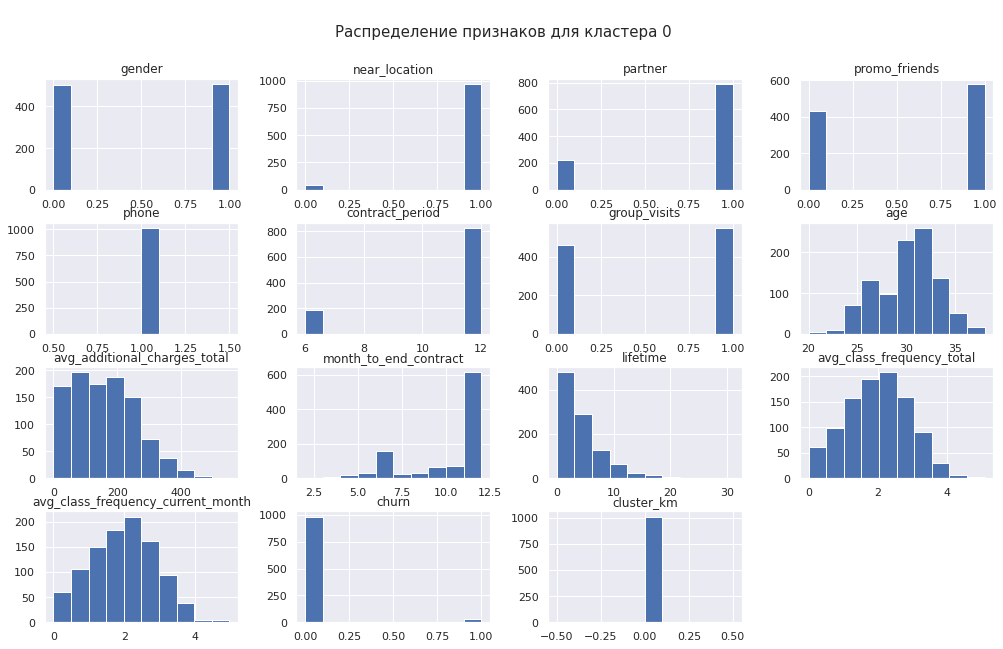

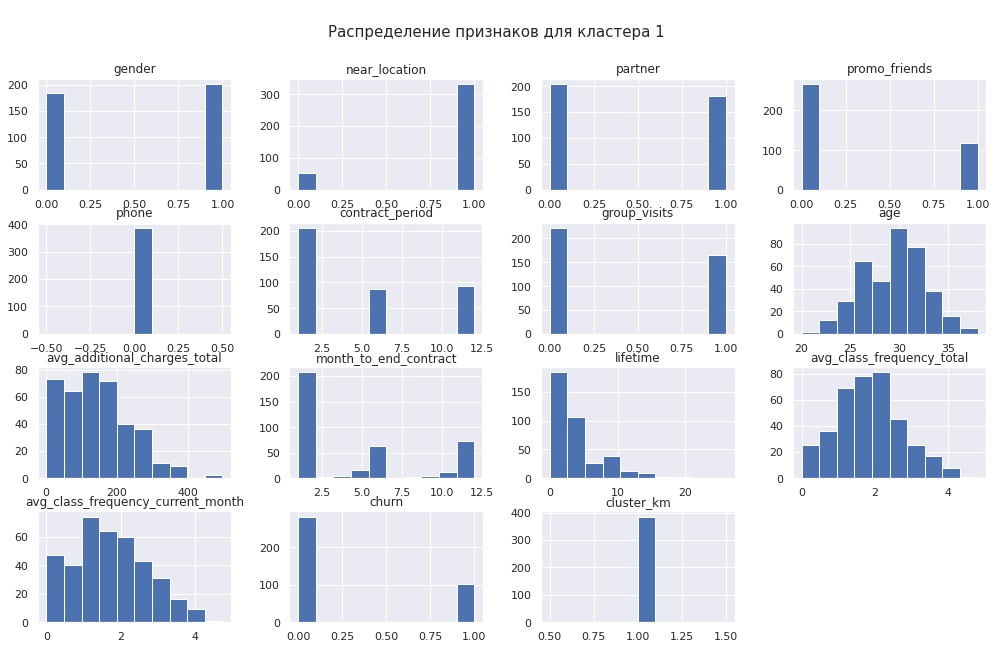

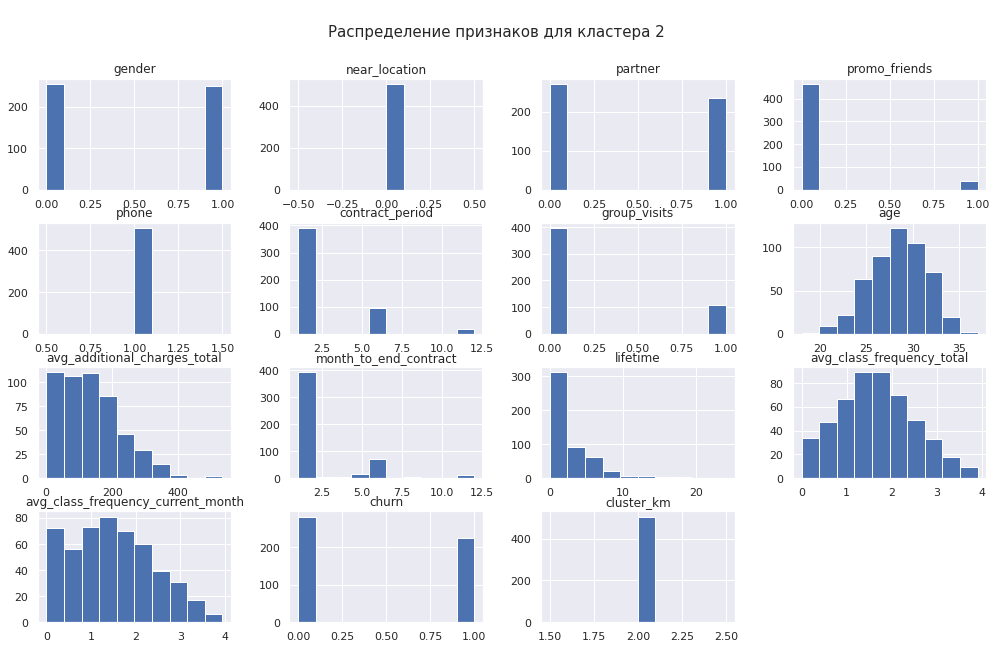

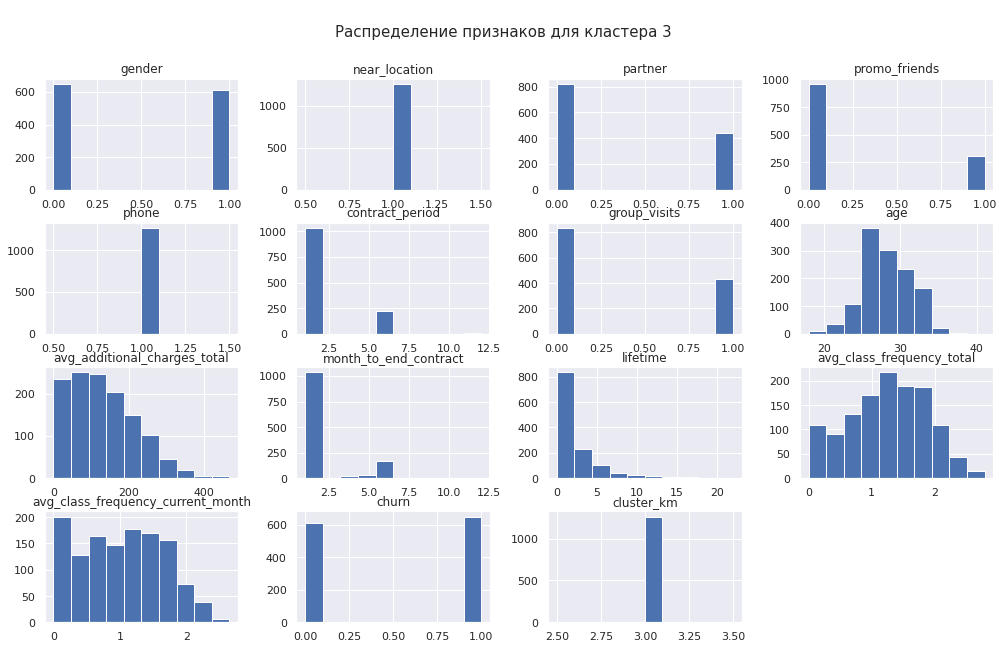

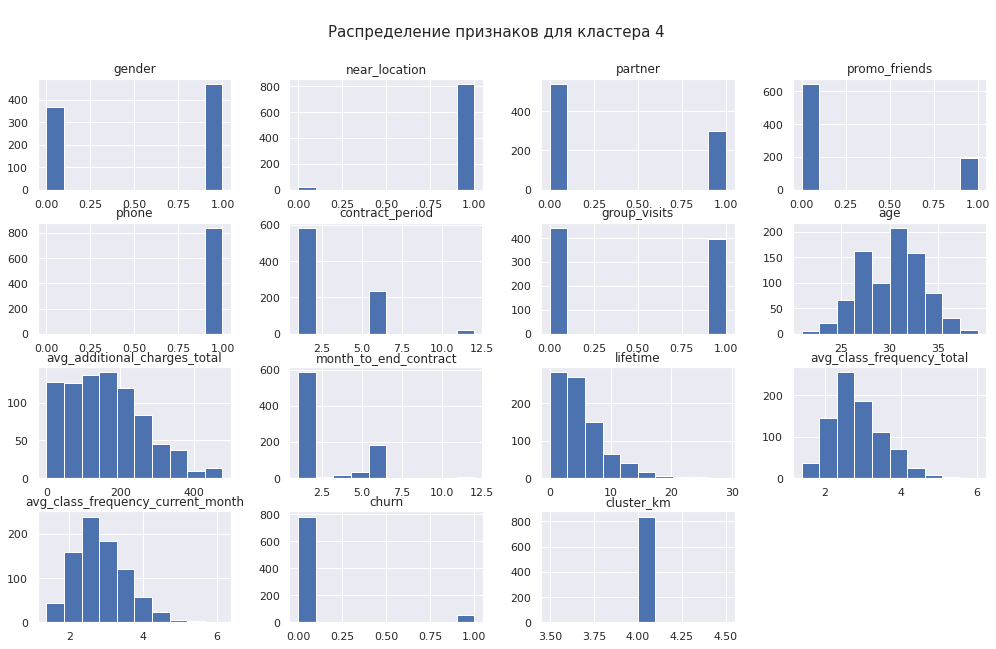

In [22]:
for value in [0, 1, 2, 3, 4]:
    gym_churn[gym_churn['cluster_km']==value].hist(figsize=(17,10))
    plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
    plt.show()

Построим распределение признаков для кластеров для категориальных переменных.

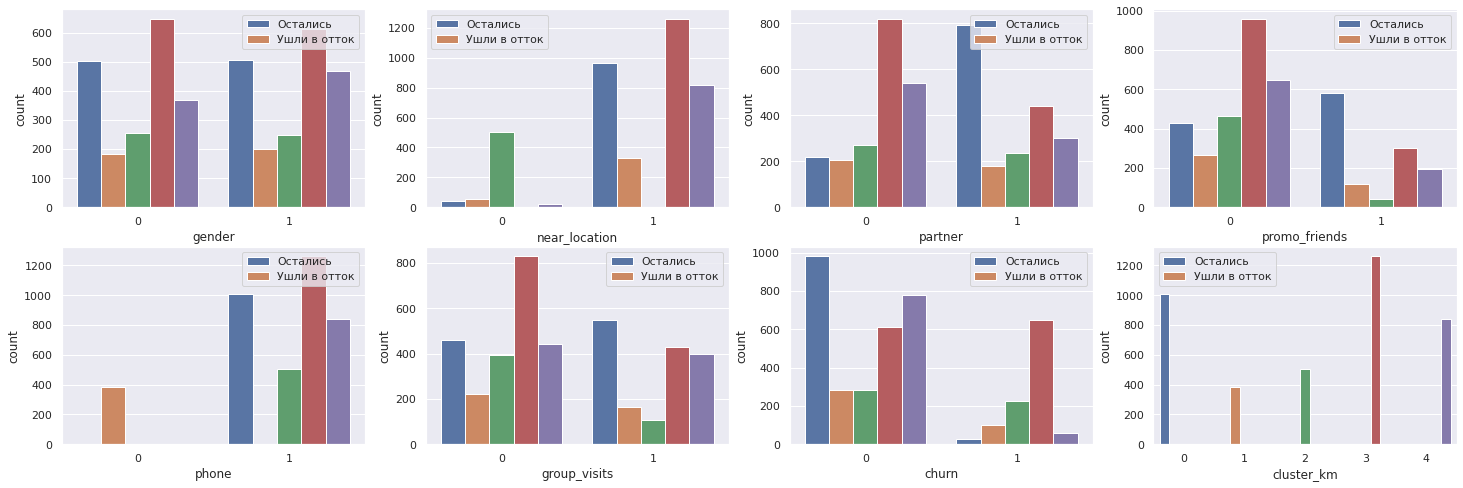

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,8))
axes_list = [item for sublist in axes for item in sublist]
for column in gym_churn.columns:
    if column not in distplot_columns:
        ax = axes_list.pop(0)
        sns.countplot(x = gym_churn[column], hue='cluster_km', data=gym_churn, ax=ax)
        ax.legend(['Остались', 'Ушли в отток'])

Построим графики распределения признаков для кластеров для числовых переменных.

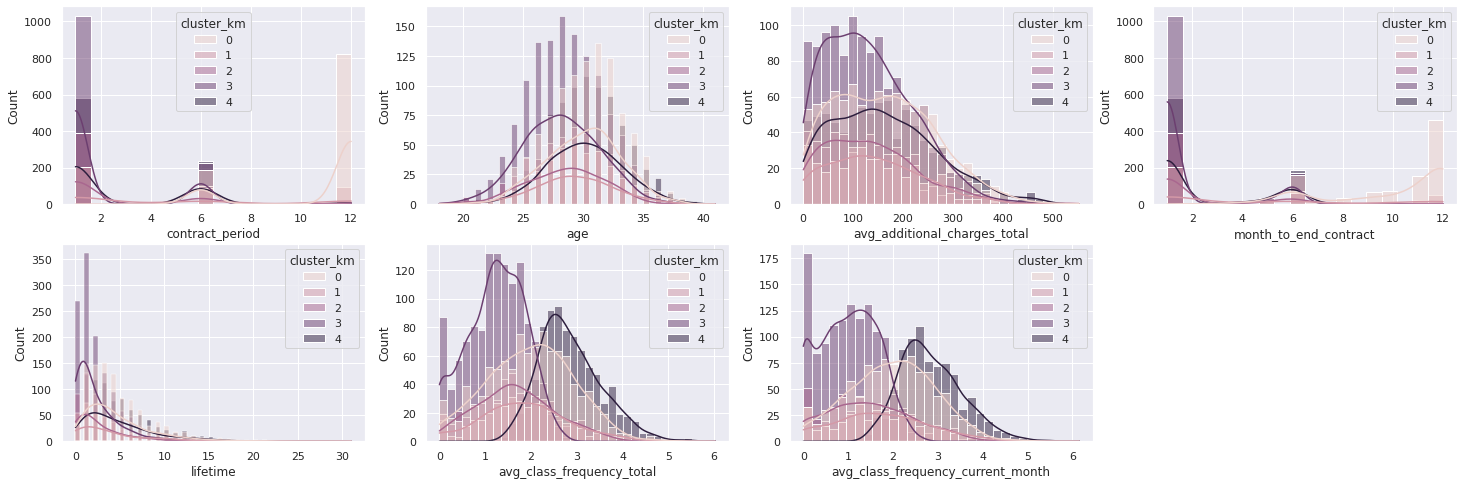

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,8))
axes_list = [item for sublist in axes for item in sublist]
fig.delaxes(axes_list[-1])
for column in gym_churn.columns:
     if column in distplot_columns:
        ax = axes_list.pop(0)
        sns.histplot(x = gym_churn[column], hue='cluster_km', data=gym_churn, kde = True, ax=ax)
        

Посчитаем долю оттока для каждого кластера. 

In [25]:
# Считаем число ушедших в каждом кластере. 

gym_churn_query = gym_churn.query('churn == 1')
gym_churn_query = gym_churn_query.groupby('cluster_km')['churn'].count()
gym_churn_query = gym_churn_query.to_frame().reset_index()
gym_churn_query

,cluster_km,churn
0,0,28
1,1,103
2,2,224
3,3,649
4,4,57


In [26]:
# Считаем общее кол-во человек для каждого кластера.

cluster_count = gym_churn.groupby('cluster_km')['gender'].count()
cluster_count = cluster_count.to_frame().reset_index()
cluster_count

,cluster_km,gender
0,0,1010
1,1,385
2,2,505
3,3,1262
4,4,838


In [27]:
# Считаем % оттока для каждого кластера.

print('% оттока для кластеров:')

gym_churn_query['churn'] / cluster_count['gender']

% оттока для кластеров:


0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
dtype: float64

Самые надеждные клиенты относятся к 0 кластеру, самые не надежные к 3 кластеру.  

## Выводы и базовые рекомендации по работе с клиентами

На входе мы получили датасет с 4000 строк, без пропусков в данных, без дубликатов. 

Выводы по имеющимся данным:

- Клиенты, которые ушли, тратили меньше на дополнительные опции;
- Клиенты, которые остались, чаще посещают клуб, как в последний месяц, так и в общем. Средняя частота посещений в неделю за весь период использования абонемента у 50% - менее 2-ух раз, у 75% - 2,5 раза. Максимально - 6 раз, минимально - ни разу в неделю;
- Лайфтайм у клиентов, которые ушли значительно короче, около месяца;
- Распределение по возрасту незначительно отличается, клиенты, которые остались незначительно старше. Средний возраст тех, кто остался - 29 лет, а тех кто ушел - 27 лет.;
- Больше всего клиентов уходит в отток, когда подходит к концу действие абонемента, примерно за месяц до его окончания.
- Очевидно, что пол не играет роли, при принятии решения клиентом об уходе, и мужчины, и женщины принимают такие решения одинаково часто;
- Клиенты, которые проживают или работают ближе к клубу реже его покидают;
- Клиенты присоединившиеся к клубу по партнерской программе чаще в нем задерживаются, что логично;
- Пришедшие по промо-акции акции чаще уходят в отток. По промо-акции пришли 30% посетителей;
- Посещающие групповые занятия реже уходят в отток, но возможно, что есть те, кто ушли и не пробовали групповые занятия. Групповые тренировки посещают - 41 % от общего числа клиентов;
- Длительность действующего абонемента для тех, кто остался - среднее значение - более 5 месяцев, для тех, кто ушел - чуть более 1 месяца, т.е. обычно клиенты уходят в отток примерно за 1,5 месяца до окончания действия абонемента.

Матрица корреляции указала нам на мультиколленеарные признаки: в данном случае это - contract_period и month_to_end_contact, и avg_class_frequency_current_month и avg_clfss_frequency_total.

Явной зависимости факта оттока от какого-либо признака не обнаружено. Присутствует умеренная линейная зависимость между уходом из клуба и периодом абонемента, возрастом, количеством месяцев до окончания абонемента, лайфтаймом, количеством посещений за последний месяц.

После обучения моделей методами логистической регрессии и случайный лес по метрикам мы определили, что доля правильных прогнозов и их полнота незначительно выше в модели обученной методом логистической регрессии.

По результатам построения дендрограммы можно сделать такие: скорее всего клиентов клуба можно разбить на 4 класстера, возможно это будет несколько обобщенно, поэтому мы примем за число кластеров n=5.

Основные описательные характеристики для полученных кластеров:

Кластер 0:
- Отток - 3% - самый низкий
- Живут или работают недалеко от фитнес-центра
- Преобладают сотрудники компаний-партнеров - 78 %
- Заключают договора на длительный срок - более 10 месяцев
- Чаще всех посещают групповые занятия - 54 %
- Чаще всех пришли по промо-акции


Кластер 1:
- Отток - 26%
- Живут или работают недалеко от фитнес-центра
- Нет мобильного номера
- В среднем 4.5 месяцев контракты
- 30 % пришли по промо-акции

Кластер 2:
- Отток - 44 %
- Живут или работают не возле клуба
- Всего 7 % пришли по промо-акции
- Реже всех посещают групповые занятия

Кластер 3
- Отток - почти 52 % - самый высокий
- Живут или работают недалеко от фитнес-центра
- В основном обладатели недолгосрочных абонементов на 1-2 месяца
- Самые младшие по возрасту
- Меньше всех тратят на доп опции
- Наименьшее кол-во посещений за всё время и в последний месяц

Кластер 4
- Отток - менее 7 %
- Живут или работают недалеко от фитнес-центра
- Чаще всех посещают клуб - 2.85 раз в неделю
- Договора НЕ на длительный срок - в среднем 2.4 месяца

Самые надеждные клиенты относятся к 0 кластеру, самые не надежные к 3 кластеру.

По результатам исследования можно предложить следующую стратегию работы с клиентами:

- стараться увеличить долю продажи длительных абонементов, на 12 месяцев, а возможно и более;
- также можно порекомендовать увеличить количество внимания новым клиентам с недлительными абонементами, возможно отдельно приглашать их на групповые занятия, либо придумывать для них другие виды "приманок" и "возможностей" проникнуться духом клуба, возможно это промо-встреча с диетологом или тренером;
- одним из важных факторов является близость к дому или работе, поэтому логично, что клуб должен понимать адрес места жительства или работы, чтобы строить работу с клиентом;
- важно продолжать сотрудничество с компаниями партнерами, они могут являться основными поставщиками новых клиентов, ну и клиенты пришедшие от них более стабильно посещают клуб;
- клиенты 4 кластера скорее всего являются теми, кто готовится к мероприятию или худеет к лету или к новому году, работу с ними можно также стараться выстраивать на грамотном общении тренеров и персонала, для привития им культуры занятий спортом и здорового образа жизни. 
